# Proyek Pertama : Predictive Analytics

Disusun oleh :

Nama : Muhammad Nurul Fatwa Al Fajar

ID : mc009d5y0699

Email : mc009d5y0699@student.devacademy.id

Link Dataset : https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

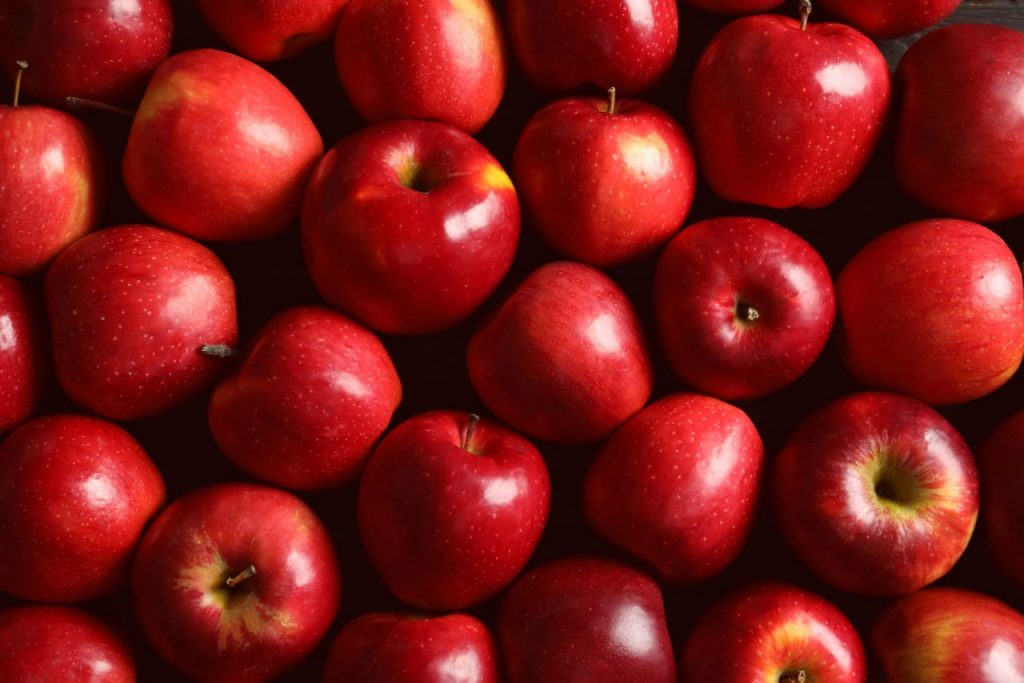

# Uraian Proyek

Gambaran Latar Belakang Proyek Penilaian Kualitas Apel dengan Algoritma Machine Learning

Proyek ini bertujuan untuk merancang sebuah model machine learning guna memperkirakan kualitas apel secara lebih tepat dan efisien. Pada praktik saat ini, penilaian mutu apel masih dilakukan secara manual, yang memerlukan waktu dan tenaga cukup besar serta berisiko menimbulkan kesalahan. Kondisi ini dapat menimbulkan kerugian bagi para petani maupun distributor itu sendiri, serta mengakibatkan ketidaksesuaian produk dengan ekspektasi konsumen yang memakannya. Dengan adanya model prediksi berbasis machine learning, permasalahan tersebut dapat diminimalisir melalui pendekatan yang lebih akurat, efisien, dan bersifat transparan.

# 1. Memuat Library yang Diperlukan

In [2]:
# Melakukan koneksi ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Collab Sudah terhubung Ke Google Drive

In [3]:
# Memuat Library untuk Pengambilan dan Pemrosesan Data
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Library untuk Membagi Data Menjadi Data Latih dan Uji
from sklearn.model_selection import train_test_split

# Library untuk Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

# Library untuk Model Klasifikasi
from sklearn.neighbors import KNeighborsClassifier# Model K-Nearest Neighbors
from sklearn.ensemble import RandomForestClassifier# Model Random Forest
from sklearn.metrics import accuracy_score# Metode Evaluasi Akurasi
from sklearn.naive_bayes import BernoulliNB

Library Diatas Digunakan Untuk Proses Yang akan berlangsung selama pelatihan model

# 2. Data Understanding

Data Understanding atau pemahaman data merupakan tahap untuk mengerti isi dari data yang dimiliki serta menilai sejauh mana kualitas data tersebut dapat mendukung proses analisis

Dataset yang digunakan dalam proyek ini merupakan data Kualitas Apel dengan berbagai karakteristiknya , Dataset ini dapat diunduh di Kaggle :  https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality


Berikut Informasi Pada Dataset :
- Dataset memiliki format CSV (Comma-Seperated Values).
- Dataset memiliki 4001 sample dengan 9 fitur.
- Dataset memiliki 7 fitur bertipe float64 dan 2 fitur bertipe object.
- ada missing value pada dataset dan akan dihapus
- ada 1 fitur yang tidak digunakan dan akan dihapus

Dari dataset yang ada, kita dapat mengamati bahwa dataset ini memuat 9 fitur atau kolom, dengan variabel yang ada yaitu:

- A_id : Merupakan identitas unik untuk masing-masing apel

- Size : Menunjukkan ukuran dari apel

- Weight : Mewakili massa atau bobot apel

- Sweetness : Menggambarkan seberapa manis rasa apel

- Crunchiness : Menunjukkan tingkat kerenyahan dari tekstur apel

- Juiciness : Mengindikasikan seberapa segar atau berair apel tersebut

- Ripeness : Menggambarkan level kematangan buah

- Acidity : Menyatakan kadar keasaman yang dimiliki apel

- Quality : Menjadi indikator penilaian kualitas keseluruhan apel

Dari 9 fitur yang disedia oleh dataset bisa dilihat bahwasanya A_id ada id unik untuk penanda masing-masing baris kolom/fitur tersebut tidak diperlukan untuk model.

# 2.1 Data Loading

Data Loading merupakan tahap awal dalam proses analisis data yang bertujuan untuk memuat dataset yang akan digunakan, sehingga memudahkan proses pemahaman terhadap data tersebut. Adapun informasi dalam dataset ini telah melalui proses pembersihan dan normalisasi oleh pihak penyedia, sehingga dataset menjadi lebih mudah digunakan, terutama bagi pemula.

## Informasi Dataset

| Tipe    | Keterangan                                      |
|-----------|--------------------------------------------------|
| Title     | Apple Quality                                    |
| Source    | Kaggle                                           |
| Maintainer| Nidula Elgiriyewithana                         |
| License   | Other (specified in description)                 |
| Visibility| Public                                           |
| Tags      | Computer Science, Education, Food, Data Visualization, Classification,Exploratory Data Analysis |
| Usability | 10.00                                            |


In [4]:
# Membaca file CSV bernama "apple quality.csv" yang berada di gdrive, dan memuat isinya ke dalam sebuah dataframe yang diberi nama data menggunakan library pandas.
data = pd.read_csv('/content/drive/My Drive/Predictive Analytics Fajar/apple_quality.csv')
# data = pd.read_csv('/content/drive/My Drive/Notebook/Apple_kaggle/apple_quality.csv')

# 2.2 Exploratory Data Analysis (EDA)

Analisis data eksploratif adalah tahap awal dalam memahami data yang dilakukan untuk menggali karakteristik utama, mengidentifikasi pola, mendeteksi keanehan, serta mengevaluasi asumsi yang mungkin ada. Proses ini umumnya memanfaatkan metode statistik serta visualisasi untuk mempermudah pemahaman data secara menyeluruh.

## 2.2.1 EDA – Uraian Variabel

In [5]:
# Memanggil dataframe untuk dimuat dan ditampilkan
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


Dari DataFrame yang ditampilkan sebelumnya, kita dapat mengamati bahwa dataset ini memuat 9 fitur atau kolom, yaitu:


- A_id : Merupakan identitas unik untuk masing-masing apel

- Size : Menunjukkan ukuran dari apel

- Weight : Mewakili massa atau bobot apel

- Sweetness : Menggambarkan seberapa manis rasa apel

- Crunchiness : Menunjukkan tingkat kerenyahan dari tekstur apel

- Juiciness : Mengindikasikan seberapa segar atau berair apel tersebut

- Ripeness : Menggambarkan level kematangan buah

- Acidity : Menyatakan kadar keasaman yang dimiliki apel

- Quality : Menjadi indikator penilaian kualitas keseluruhan apel

In [6]:
# menampilkan ringkasan Informasi dataframe sebelum salah satu fitur dihapus
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


Terlihat Kolom A_id ada di dataframe

In [7]:
# Melakukan Penghapusan Kolom "A_id" Karena tidak diperlukan
data.drop("A_id", axis=1, inplace=True)

In [8]:
# menampilkan ringkasan informasi tentang DataFrame data, termasuk:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


Berdasarkan hasil dari metode df.info(), dapat disimpulkan bahwa:

- 6 kolom memiliki tipe data numerik float64, yaitu: Size, Weight, Sweetness, Crunchiness, Juiciness, dan Ripeness.

- 2 kolom lainnya bertipe data object, yaitu: Acidity dan Quality.

Meskipun begitu, pada data sebenarnya, kolom Acidity seharusnya bertipe numerik (float64). Oleh karena itu, kita akan melakukan konversi tipe data pada kolom tersebut agar sesuai dengan format yang semestinya.

In [9]:
# melihat ringkasan statistik deskriptif dari kolom-kolom numerik dalam dataFrame "data".
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


Metode describe() digunakan untuk menampilkan ringkasan statistik dari setiap kolom dalam dataset, meliputi:

- Count: Jumlah entri atau data yang tersedia dalam setiap kolom.

- Mean: Nilai rata-rata dari data pada masing-masing kolom.

- Std: Menunjukkan standar deviasi, yang merepresentasikan sebaran data dari nilai rata-ratanya.

- Min: Nilai terkecil yang ditemukan pada kolom tersebut.

- 25%: Merupakan kuartil pertama, yaitu batas nilai di mana 25% data berada di bawahnya.

- 50%: Dikenal juga sebagai median atau kuartil kedua, merupakan nilai tengah dari distribusi data.

- 75%: Kuartil ketiga, yang menandai bahwa 75% dari data berada di bawah nilai ini.

- Max: Nilai terbesar dalam setiap kolom.

In [10]:
# mengetahui dimensi dari DataFrame data.
data.shape

(4001, 8)

Hasil dari pemanggilan data.shape menunjukkan bahwa:

## Informasi Dataset

| Jumlah baris Yang Ada    | Jumlah Kolom Yang Ada             |
|--------------------------|-----------------------------------|
| 4001                     | 8                                 |


## 2.2.2 EDA - Univariate Analysis ( Analisis Univariate )

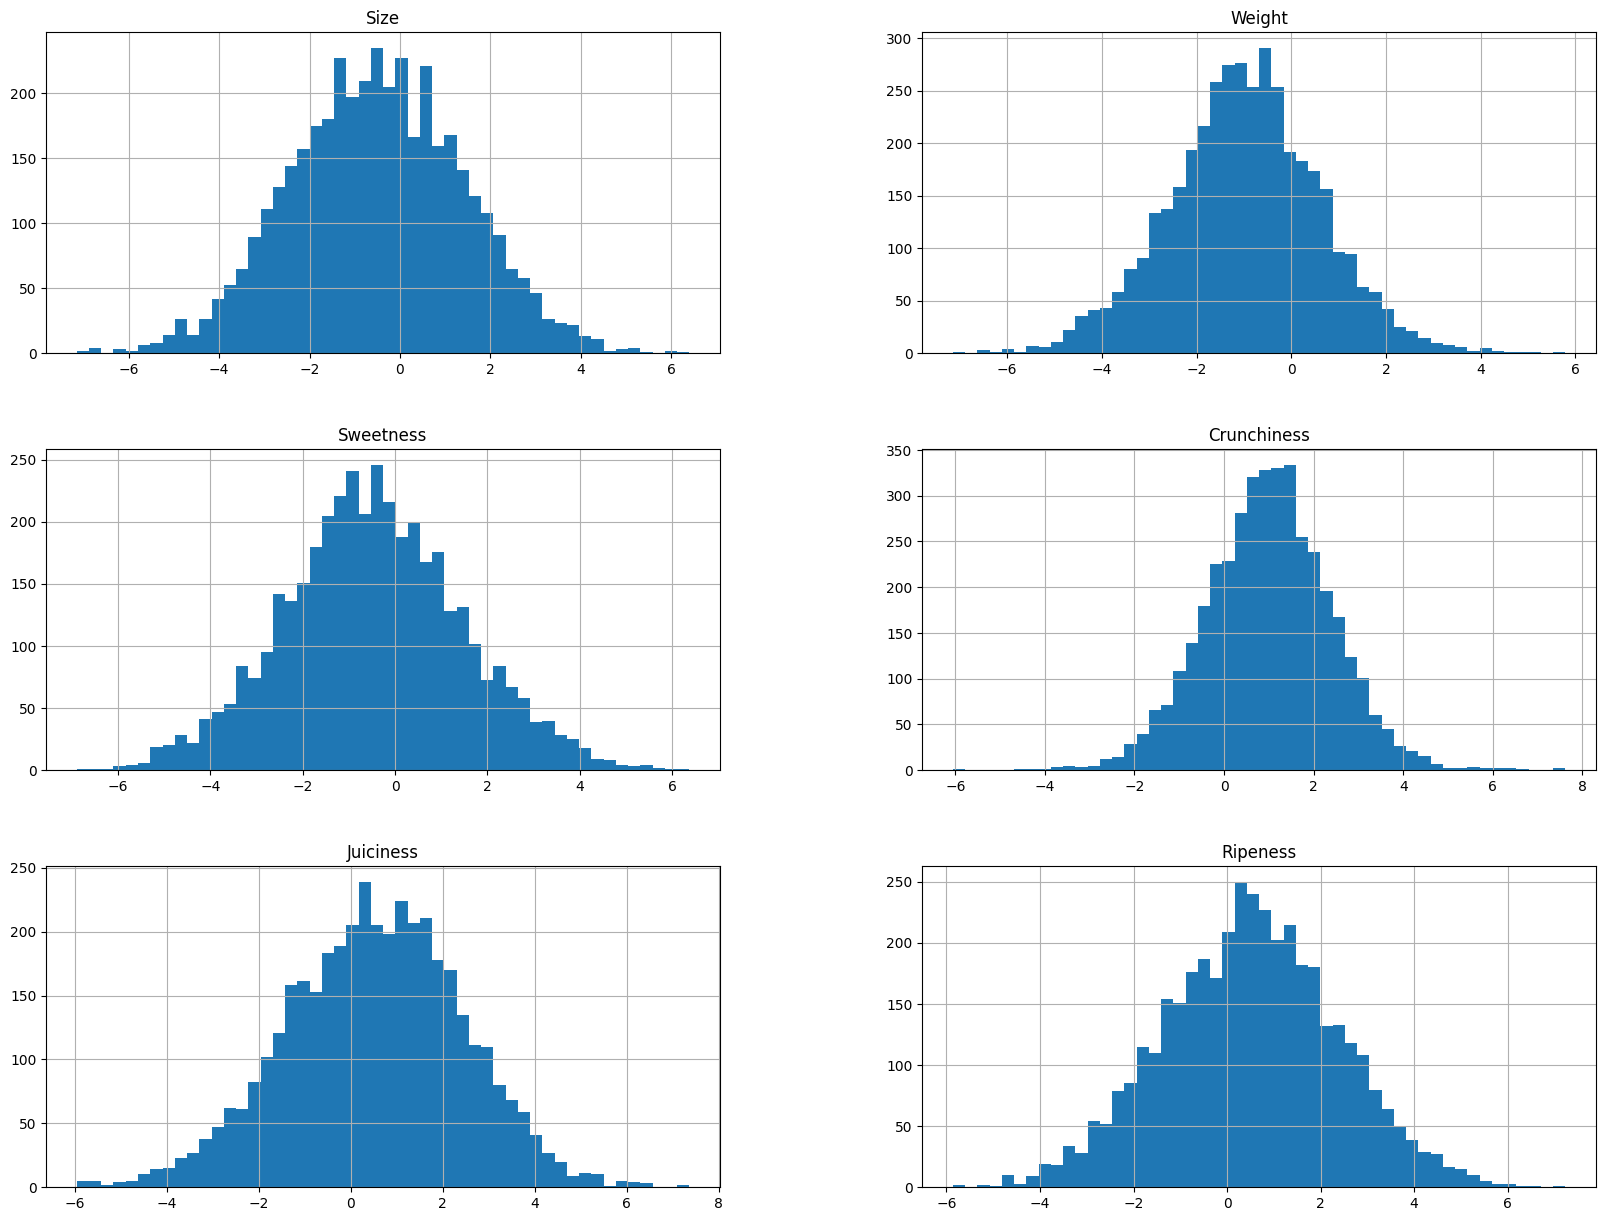

In [11]:
# Membuat histogram untuk setiap kolom numerik dalam data
# menjadi 50 interval pada sumbu x, sehingga hasil grafik lebih detail.
# figsize=(20,15) menentukan ukuran gambar (20 inci lebar, 15 inci tinggi) agar grafik tidak terlalu kecil.
data.hist(bins=50, figsize=(20,15))
plt.show()

# 2.2.3 EDA - Multivariate Analysis (Analisis Multivariat)

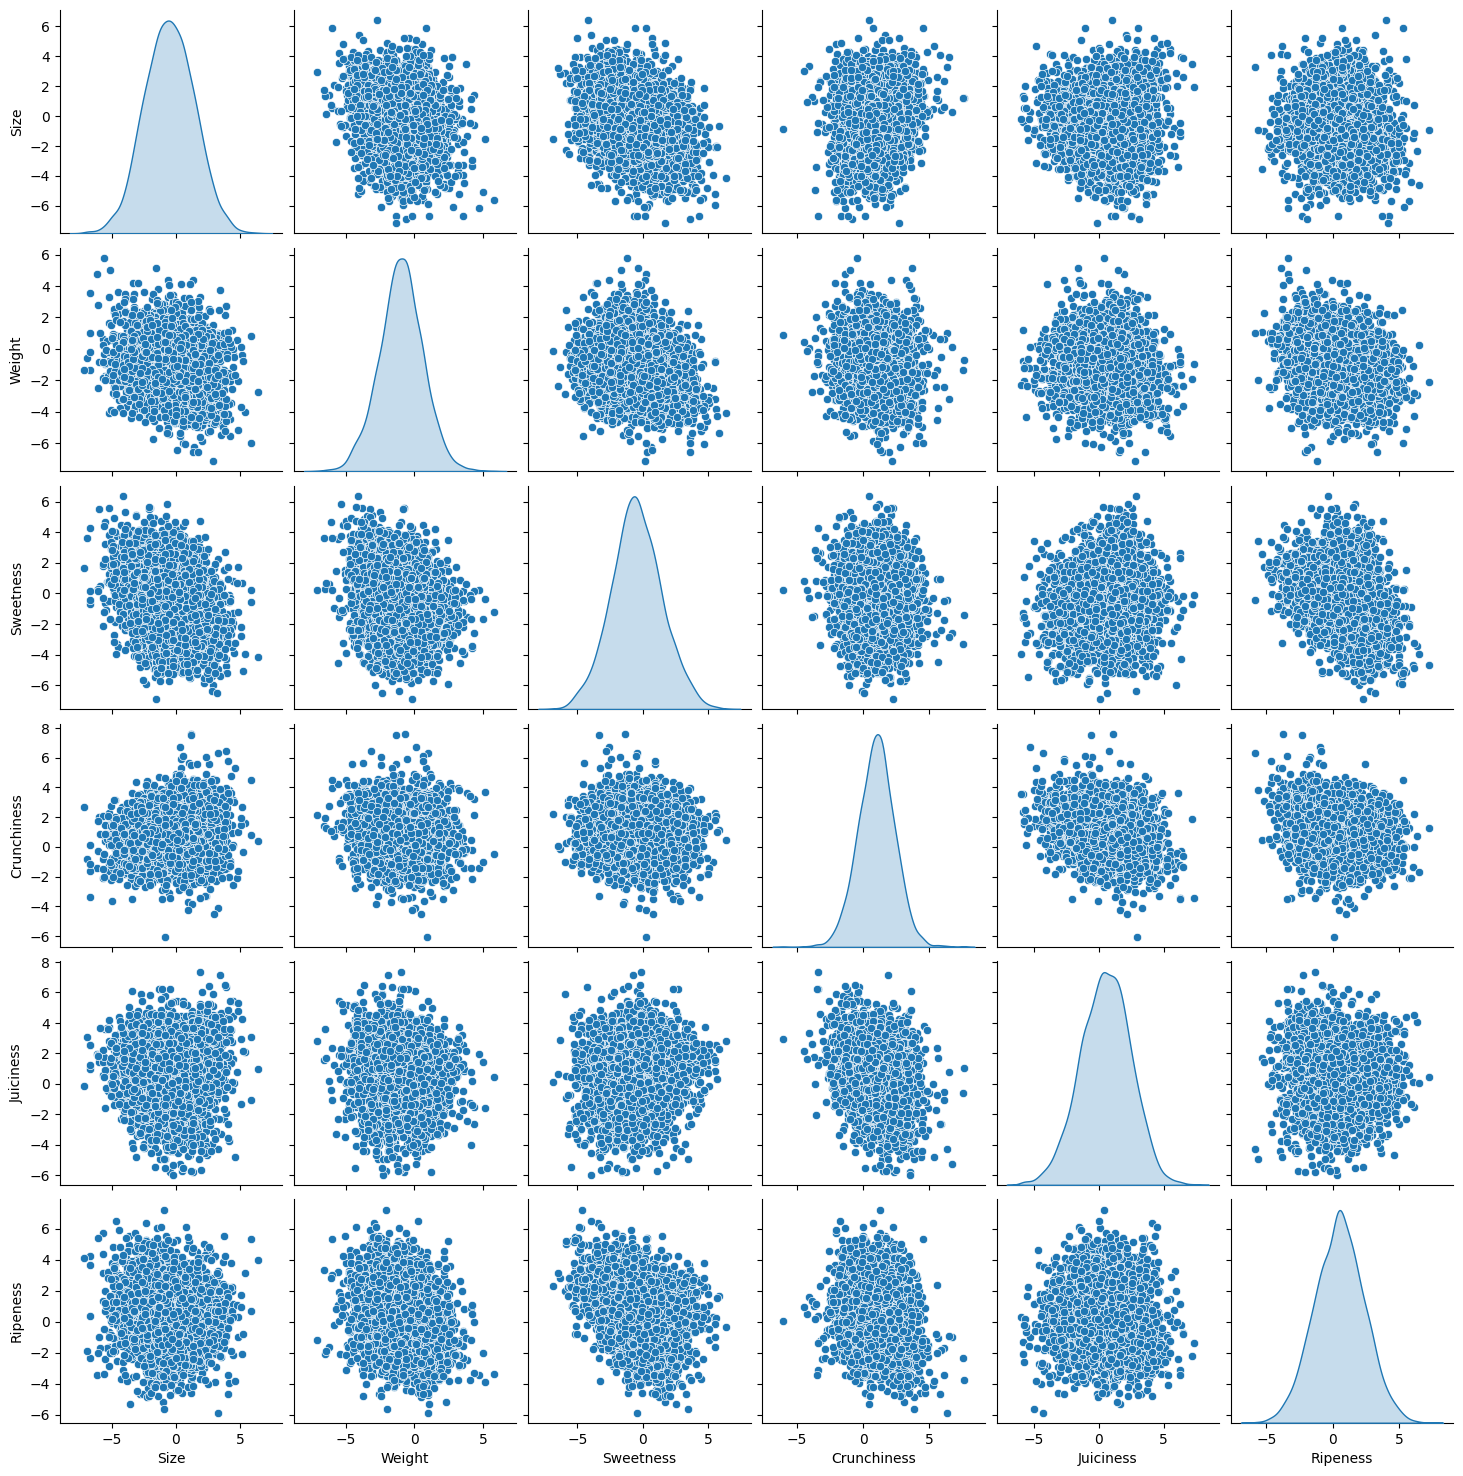

In [12]:
# membuat grafik yang menunjukkan hubungan antar semua kolom numerik dalam dataset data.
sns.pairplot(data, diag_kind = 'kde')

# 3. Data Preparation ( Persiapan Data )

## 3.1 - Penyesuaian Terhadap Missing Value dan Outlier

### 3.1.1 Memeriksa keberadaan data yang muncul lebih dari satu kali.

In [13]:
# Mengetahui jumlah baris yang duplikat
data.duplicated().sum()

np.int64(0)

Tidak ada Data Yang Duplikat

### 3.1.2 menunjukkan jumlah nilai kosong (null/NaN) di setiap kolom DataFrame

In [14]:
# mengecek jumlah nilai kosong (null/NaN) di setiap kolom dalam DataFrame data.
data.isnull().sum()

,0
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


Dari Hasil itu ada sekitar 7 Nilai yang Kosong dengan hasil sebagai berikut :
- Size: 1 nilai kosong
- Weight: 1 nilai kosong
- Sweetness: 1 nilai kosong
- Crunchiness: 1 nilai kosong
- Juiciness: 1 nilai kosong
- Ripeness: 1 nilai kosong
- Acidity: 0 nilai kosong
- Quality: 1 nilai kosong

### 3.1.3 Membuang Nilai Kosong

In [15]:
# menyaring dan menampilkan semua baris dalam data yang memiliki setidaknya satu nilai kosong (missing/NaN).
data_miss = data[data.isnull().any(axis=1)]
data_miss

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


Terlihat bahwa terdapat data yang hilang, dan akan kita buang dari dataset. Mungkin itu adalah data yang tidak relevan dan merukapan watermark dari pemilik dataset

In [16]:
# Menghapus semua baris di dataframe data yang mengandung setidaknya satu nilai kosong (NaN).
data.dropna(inplace=True)
data.isnull().sum().sum()

np.int64(0)

Data Tidak Relevan Sudah Kita Buang

In [17]:
# Menampilkan ringkasan statistik
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### 3.1.4 Mengubah Tipe Data Kolom Acidity Yang Semula "Object" menjadi float64

In [18]:
#  mengubah tipe data kolom Acidity menjadi float64 (bilangan desimal presisi tinggi).
data["Acidity"] = data["Acidity"].astype("float64")

Mengonversi tipe data pada kolom Acidity menjadi float64.

In [19]:
# menampilkan informasi ringkas tentang struktur DataFrame data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


Terlihat bahwa terdapat 7 kolom bertipe data float64 dan 1 kolom bertipe object. ( hal ini karena kita sudah mengubah Acidity yang awalnya bertipe "Object" menjadi "float64" )

### 3.1.5 Pengecekan Dataset Yang Sudah di Atur Sesuai Kebutuhan

In [20]:
# digunakan untuk mengetahui dimensi dari DataFrame data.
data.shape

(4000, 8)

Setelah menghapus data yang tidak relevan, jumlah dataset kini menjadi 4000.

### 3.1.6 Visualisasi Outlier

Visualisasi Outlier digunakan untuk memberi gambaran bahwa masih ada data yang sekiranya jauh dari kata sempurna untuk pelatihan model dan melakukannya secara visual pada setiap fitur numerik

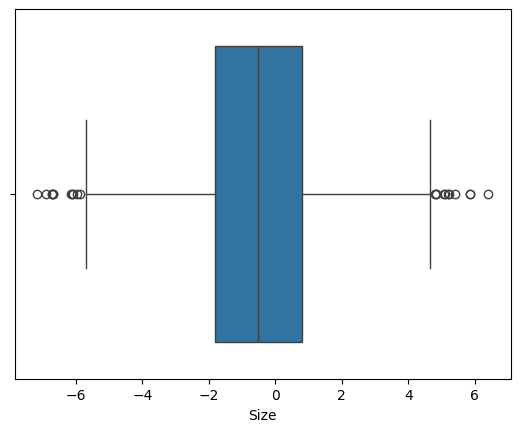

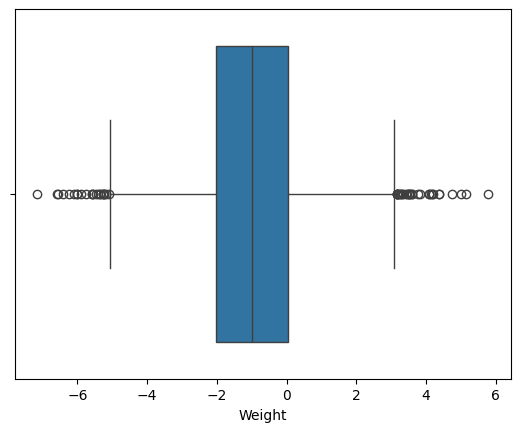

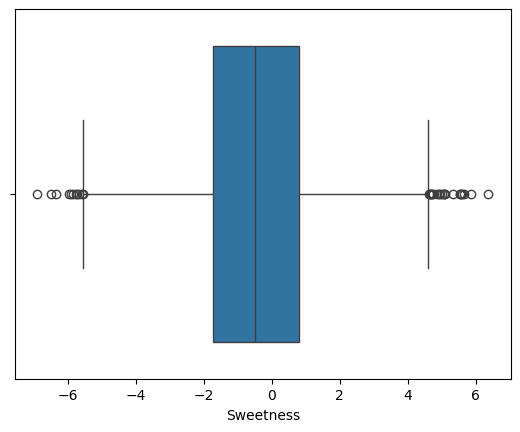

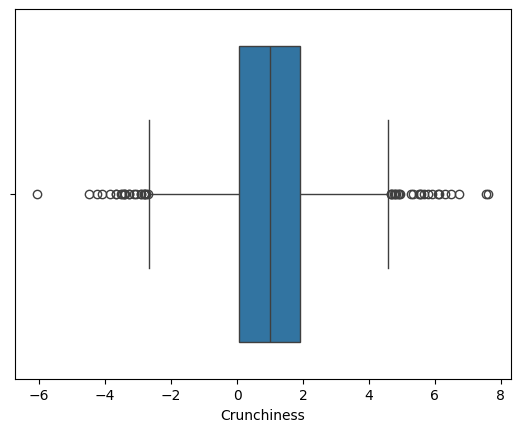

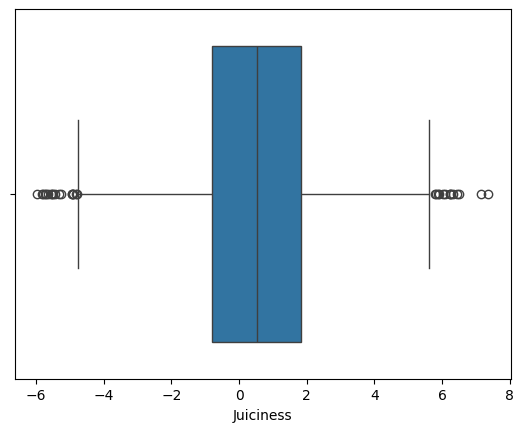

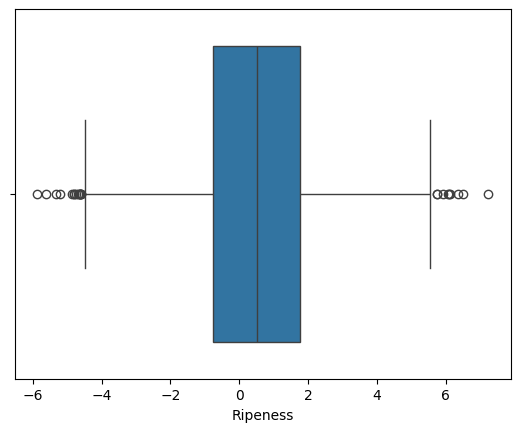

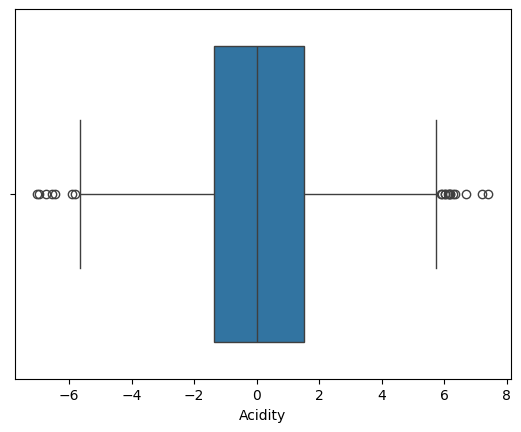

In [21]:
# Untuk mendeteksi outlier secara visual pada setiap fitur numerik.
data_outlier=data.select_dtypes(exclude=['object'])
for column in data_outlier:
        plt.figure()
        sns.boxplot(data=data_outlier, x=column)

**Mengeliminasi Outlier dari Dataset**

Dalam kasus ini, kita akan mengidentifikasi nilai-nilai pencilan (outlier) menggunakan metode visualisasi data, yaitu boxplot. Setelah itu, kita akan mengatasi nilai pencilan tersebut dengan menerapkan metode Interquartile Range (IQR).

IQR (Interquartile Range) adalah rentang antar kuartil, dihitung dengan rumus:

    IQR = Kuartil Ketiga (Q3) - Kuartil Pertama (Q1)


In [22]:
# Q1 and Q3 calculation and IQR on the numerical columns
Q1 = data_outlier.quantile(0.25)
Q3 = data_outlier.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier mask based on the numerical columns
outlier_mask = ((data_outlier < (Q1 - 1.5 * IQR)) | (data_outlier > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the original DataFrame using the outlier mask
data = data[~outlier_mask]

In [23]:
# digunakan untuk mengetahui dimensi dari DataFrame data setelah dibersihkan.
data.shape

(3790, 8)

Total data yang tersisa setelah outlier dihapus: 3790 baris, 8 kolom

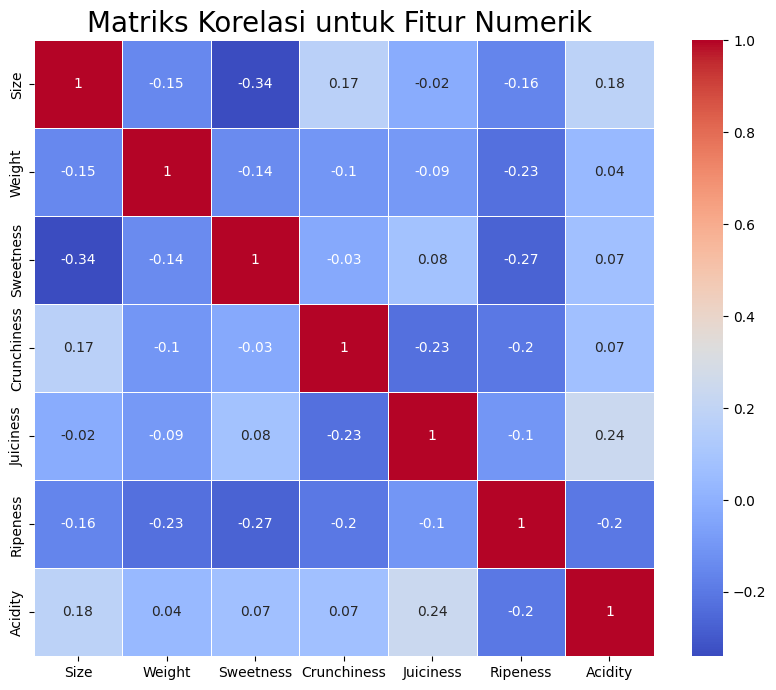

In [24]:
# Identify numeric columns
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
# Calculate correlation matrix only for numeric columns
correlation_matrix = numeric_data.corr().round(2) # Changed to numeric_data

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title(f"Matriks Korelasi untuk Fitur Numerik ", size=20)
plt.show()

In [25]:
# mengubah nilai di kolom Quality dari bentuk teks menjadi angka.
data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)  # good:1 , bad:0

<ipython-input-25-667a8c87e33c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quality'] = data['Quality'].apply(lambda x: 1 if x == 'good' else 0)  # good:1 , bad:0


In [26]:
# Untuk memisahkan data fitur dan label sebelum melakukan pelatihan model machine learning.
x = data.loc[:, data.columns != 'Quality']
y = data['Quality']

x.shape, y.shape

((3790, 7), (3790,))

## 3.2 Train-Test-Split

### 3.2.1 Disini kita membagi data menjadi 2 yaitu, 80% untuk Pelatihan/ Train dan 20% untuk Pengujian/Test



In [27]:
# Split data menjadi 80% untuk pelatihan dan 20% untuk pengujian

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=60)

Mencetak Jumlah Data keseluruhan, pelatihan dan pengujian

In [28]:
print(f'Jumlah keseluruhan data: {x.shape[0]}')
print(f'Jumlah data untuk pelatihan: {x_train.shape[0]}')
print(f'Jumlah data untuk pengujian: {x_test.shape[0]}')

Jumlah keseluruhan data: 3790
Jumlah data untuk pelatihan: 3032
Jumlah data untuk pengujian: 758


## 3.3 Normalisasi

### 3.3.1 Disini kita mengubah nilai data ke dalam skala yang sama

Kode ini melakukan Min-Max Scaling, yaitu mengubah nilai-nilai data agar berada dalam skala yang sama, biasanya antara 0 dan 1.



In [29]:
# Normalisasi fitur menggunakan Min-Max Scaling
normalizer = MinMaxScaler()
# Replace 'X_train' with 'x_train'.
normalizer.fit(x_train)

X_train_scaled = normalizer.transform(x_train)
X_test_scaled = normalizer.transform(x_test)

Mengapa penting?
Untuk memastikan semua fitur (kolom) memiliki pengaruh yang seimbang saat digunakan oleh algoritma machine learning, karena banyak algoritma sensitif terhadap perbedaan skala nilai.

# 4. Modelling

Proses modelling pada machine learning adalah tahap di mana kita membuat, melatih, dan mengevaluasi model dengan tujuan agar model tersebut mampu mengenali pola dari data dan membuat prediksi yang akurat terhadap data yang diberikan pada inputan.

disini saya mengambil 3 model untuk perbandingan, yaitu :

1. K-Nearest Neighbor (KNN)
2. Random Forrest (RF)
3. Naive Bayes (NB)

In [34]:
# Membuat DataFrame kosong untuk menyimpan skor akurasi dari beberapa model klasifikasi
models = pd.DataFrame(data=None,
                      index=['accuracy_score'],
                      columns=['KNN', 'RandomForest', 'Naive Bayes'])

Bagian kode diatas dipakai untuk menyimpan hasil akurasi dari 3 model. Kemudian, kode dibawah digunakan untuk memvisualisasikan hasil akurasi tersebut, seperti dalam bentuk boxplot, agar memudahkan dalam membandingkan performa antar model yang dipilih

## 4.1 KNN (K-Nearest Neighbor)

In [35]:
# # Model KNN
# # Model ini menggunakan algoritma K-Nearest Neighbors dengan parameter k = 5. Model dipilih karena kesederhanaannya dan kemampuannya dalam klasifikasi berbasis jarak.
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

Membuat dan melatih model K-Nearest Neighbors dengan jumlah tetangga = 5 dan pembobotan berdasarkan jarak

In [36]:
# Melakukan prediksi dengan model KNN pada data uji
prediksi_knn = knn.predict(x_test)

# Menyimpan nilai akurasi prediksi model KNN ke dalam DataFrame
models.at['accuracy_score', 'KNN'] = accuracy_score(y_test, prediksi_knn)

## 4.2 Random Forest ( decision trees )

In [37]:
# Membuat dan melatih model Random Forest dengan kedalaman maksimum pohon sebesar 20
rf_model = RandomForestClassifier(max_depth=20)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

kedalaman maksimum pohon sebesar 20

In [38]:
# Menggunakan model Random Forest untuk memprediksi label data uji
# The model was instantiated as 'rf_model', not 'model_rf'
prediksi_rf = rf_model.predict(x_test)

# Menyimpan hasil akurasi ke dalam DataFrame models untuk algoritma Random Forest
models.at['accuracy_score', 'RandomForest'] = accuracy_score(y_test, prediksi_rf)

## 4.3 Naive Bayes

In [39]:
# Membuat dan melatih model Naive Bayes (varian Bernoulli) dengan data pelatihan
nb_model = BernoulliNB()
nb_model.fit(x_train, y_train)

BernoulliNB()

Menggunakan Varian BernoulliNB

In [40]:
# Melakukan prediksi pada data uji menggunakan model Naive Bayes
prediksi_nb = nb_model.predict(x_test)

# Menyimpan nilai akurasi dari model Naive Bayes ke dalam tabel models
models.at['accuracy_score', 'Naive Bayes'] = accuracy_score(y_test, prediksi_nb)

# 5. Evaluasi Model ( Mengevaluasi semua model )

In [41]:
# Memperlihatkan Akurasi Tiap Model
print(models)

                     KNN RandomForest Naive Bayes
accuracy_score  0.898417     0.885224    0.641161


Dari hasil 3 model itu kita bisa lihat

1. KNN dengan akurasi :  0.898417
2. RF dengan akurasi : 0.885224
3. NB dengan akurasi : 0.641161

## 5.1 (boxplot) Untuk Visualisasi Model

Setelah 3 model dihitung, selanjutnya menempatkannya pada model visualisasi 2D boxplot agar lebih mudah untuk dilihat

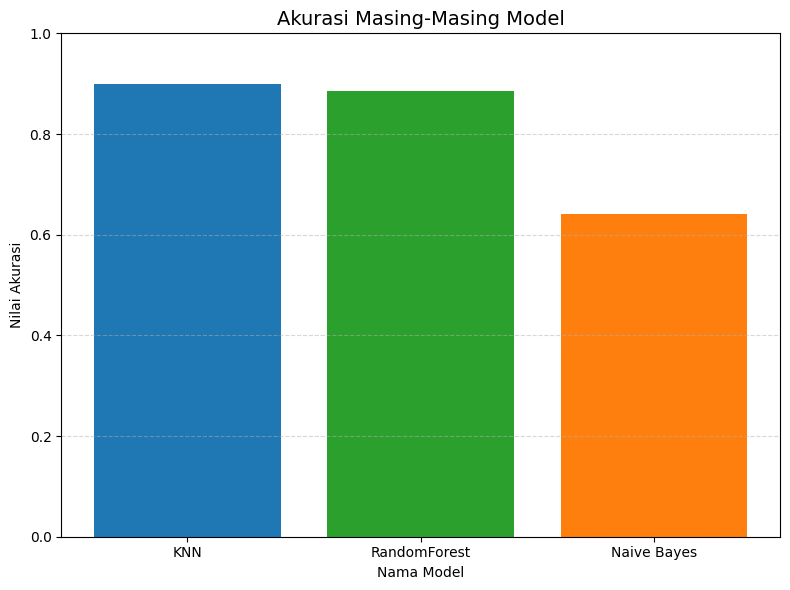

In [42]:
# Nama model dan nilai akurasi
model_names = ['KNN', 'RandomForest', 'Naive Bayes']
accuracy_values = [
    models.loc['accuracy_score', 'KNN'],
    models.loc['accuracy_score', 'RandomForest'],
    models.loc['accuracy_score', 'Naive Bayes'],
]

# Warna berbeda untuk setiap model
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

# Plot batang berwarna
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values, color=colors)
plt.title("Akurasi Masing-Masing Model", fontsize=14)
plt.xlabel("Nama Model")
plt.ylabel("Nilai Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Kesimpulan Evaluasi

Model KNN yang diperoleh dari hasil GridSearchCV menunjukkan performa terbaik dalam klasifikasi kualitas apel, dengan akurasi mencapai **89.8%**. Hasil ini menjawab pertanyaan utama dalam proyek, yaitu:

- **Bagaimana cara membangun model machine learning untuk memprediksi kualitas apel?**
- **Algoritma apa yang paling akurat?**

Model ini dapat memberikan manfaat nyata bagi petani maupun distributor apel, di antaranya:

- Membantu dalam **klasifikasi otomatis hasil panen**.
- Mempermudah penentuan **standar mutu dan harga jual**.
- Mengurangi ketergantungan pada penilaian manual yang subjektif.

Dengan demikian, pendekatan klasifikasi menggunakan KNN tidak hanya memberikan hasil akurasi yang tinggi, tetapi juga **relevan dan aplikatif untuk digunakan dalam sistem pendukung keputusan di sektor hortikultura**, khususnya untuk komoditas apel.
